In [1]:
# install.packages("BiocManager")
# BiocManager::install("SingleR", version = "devel")

In [1]:
library(Seurat)
library(ggplot2)
# library(SingleR)
# library(dplyr)
# library(celldex)
# library(RColorBrewer)
# library(SingleCellExperiment)


In [3]:
# Load your data
adata <- read_h5ad(file = "./Impaired_local_intrinsic_immunity_to_SARS_CoV_2_infection_in_severe_COVID_19.h5ad")
adata

AnnData object with n_obs × n_vars = 32588 × 32561
    obs: 'donor_id', 'Peak_Respiratory_Support_WHO_Score', 'Bloody_Swab', 'Percent_Mitochondrial', 'SARSCoV2_PCR_Status', 'SARSCoV2_PCR_Status_and_WHO_Score', 'Cohort_Disease_WHO_Score', 'biosample_id', 'SingleCell_SARSCoV2_RNA_Status', 'SARSCoV2_Unspliced_TRS_Total_Corrected', 'SARSCoV2_Spliced_TRS_Total_Corrected', 'SARSCoV2_NegativeStrand_Total_Corrected', 'SARSCoV2_PositiveStrand_Total_Corrected', 'SARSCoV2_Total_Corrected', 'Coarse_Cell_Annotations', 'Detailed_Cell_Annotations', 'Annotation', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'mvp.mean', 'mvp.dispersion', 'mvp.dispersio

In [2]:
# install.packages("anndata")
library(anndata)
library(Seurat)
# library(SingleCellExperiment)
# library(DESeq2)

Warning message:
“package ‘anndata’ was built under R version 4.2.3”


In [4]:
# Extract gene expression matrix using as.matrix()
# gene_expression <- as.matrix(adata$X)

In [5]:
head(adata$obs, n = 5)

,donor_id,Peak_Respiratory_Support_WHO_Score,Bloody_Swab,Percent_Mitochondrial,SARSCoV2_PCR_Status,SARSCoV2_PCR_Status_and_WHO_Score,Cohort_Disease_WHO_Score,biosample_id,SingleCell_SARSCoV2_RNA_Status,SARSCoV2_Unspliced_TRS_Total_Corrected,⋯,tissue_ontology_term_id,suspension_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
GTCGGGGGGTGG_000_neg_array1,Control_Participant7,0,No,11.004785,neg,neg_0,Control_WHO_0,WHO_0_Control_Participant7,neg,0,⋯,UBERON:0001728,cell,ciliated cell,Seq-Well S3,normal,Homo sapiens,male,nasopharynx,unknown,sixth decade human stage
CAAATCAATTAT_000_neg_array1,Control_Participant7,0,No,34.210526,neg,neg_0,Control_WHO_0,WHO_0_Control_Participant7,neg,0,⋯,UBERON:0001728,cell,ciliated cell,Seq-Well S3,normal,Homo sapiens,male,nasopharynx,unknown,sixth decade human stage
ATACAATTGACA_000_neg_array1,Control_Participant7,0,No,7.068224,neg,neg_0,Control_WHO_0,WHO_0_Control_Participant7,neg,0,⋯,UBERON:0001728,cell,ciliated cell,Seq-Well S3,normal,Homo sapiens,male,nasopharynx,unknown,sixth decade human stage
CTGTTAATGAGA_000_neg_array1,Control_Participant7,0,No,3.179056,neg,neg_0,Control_WHO_0,WHO_0_Control_Participant7,neg,0,⋯,UBERON:0001728,cell,ciliated cell,Seq-Well S3,normal,Homo sapiens,male,nasopharynx,unknown,sixth decade human stage
CTTCACATTATT_000_neg_array1,Control_Participant7,0,No,2.391569,neg,neg_0,Control_WHO_0,WHO_0_Control_Participant7,neg,0,⋯,UBERON:0001728,cell,ciliated cell,Seq-Well S3,normal,Homo sapiens,male,nasopharynx,unknown,sixth decade human stage


In [6]:
head(adata$var, n = 5)

,mvp.mean,mvp.dispersion,mvp.dispersion.scaled,mvp.variable,gene_symbols,feature_is_filtered,feature_name,feature_reference,feature_biotype
,<dbl>,<dbl>,<dbl>,<lgl>,<fct>,<lgl>,<fct>,<fct>,<fct>
ENSG00000121410,0.14992383,3.431544,0.6259525,FALSE,A1BG,FALSE,A1BG,NCBITaxon:9606,gene
ENSG00000268895,0.04339643,3.255592,0.2545109,FALSE,A1BG-AS1,FALSE,A1BG-AS1,NCBITaxon:9606,gene
ENSG00000148584,0.04139799,3.348713,0.4510936,FALSE,A1CF,FALSE,A1CF,NCBITaxon:9606,gene
ENSG00000175899,0.09053621,3.264671,0.2736779,FALSE,A2M,FALSE,A2M,NCBITaxon:9606,gene
ENSG00000245105,0.03087865,3.221115,0.1817282,FALSE,A2M-AS1,FALSE,A2M-AS1,NCBITaxon:9606,gene


In [7]:
# Summary of adata$obs
summary(adata$obs)

                  donor_id     Peak_Respiratory_Support_WHO_Score Bloody_Swab
 COVID19_Participant34: 2140   8      :11981                      No :27882  
 COVID19_Participant20: 2033   0      :11180                      Yes: 4706  
 COVID19_Participant4 : 1680   7      : 3853                                 
 COVID19_Participant32: 1665   4      : 1531                                 
 Control_Participant10: 1645   5      : 1438                                 
 Control_Participant3 : 1620   1      : 1405                                 
 (Other)              :21805   (Other): 1200                                 
 Percent_Mitochondrial SARSCoV2_PCR_Status SARSCoV2_PCR_Status_and_WHO_Score
 Min.   : 0.000        neg:14515           neg_0  :11180                    
 1st Qu.: 2.786        pos:18073           pos_8  : 8646                    
 Median : 7.425                            pos_7  : 3853                    
 Mean   :12.006                            neg_8  : 3335            

In [8]:
# Summary of adata$var
summary(adata$var)

    mvp.mean        mvp.dispersion   mvp.dispersion.scaled mvp.variable   
 Min.   :0.000000   Min.   :-1.345   Min.   :-9.456781     Mode :logical  
 1st Qu.:0.009284   1st Qu.: 2.746   1st Qu.:-0.498151     FALSE:29088    
 Median :0.045667   Median : 3.164   Median : 0.197235     TRUE :3473     
 Mean   :0.168574   Mean   : 3.055   Mean   :-0.000871                    
 3rd Qu.:0.217585   3rd Qu.: 3.390   3rd Qu.: 0.585533                    
 Max.   :5.569947   Max.   : 7.466   Max.   : 9.912967                    
                                     NA's   :1                            
      gene_symbols   feature_is_filtered   feature_name  
 CLCA4-AS1  :    2   Mode :logical       A1BG    :    1  
 DNAJC9-AS1 :    2   FALSE:32561         A1BG-AS1:    1  
 GOLGA8M    :    2                       A1CF    :    1  
 KBTBD11-OT1:    2                       A2M     :    1  
 LINC00484  :    2                       A2M-AS1 :    1  
 LINC00486  :    2                       A2ML1   :  

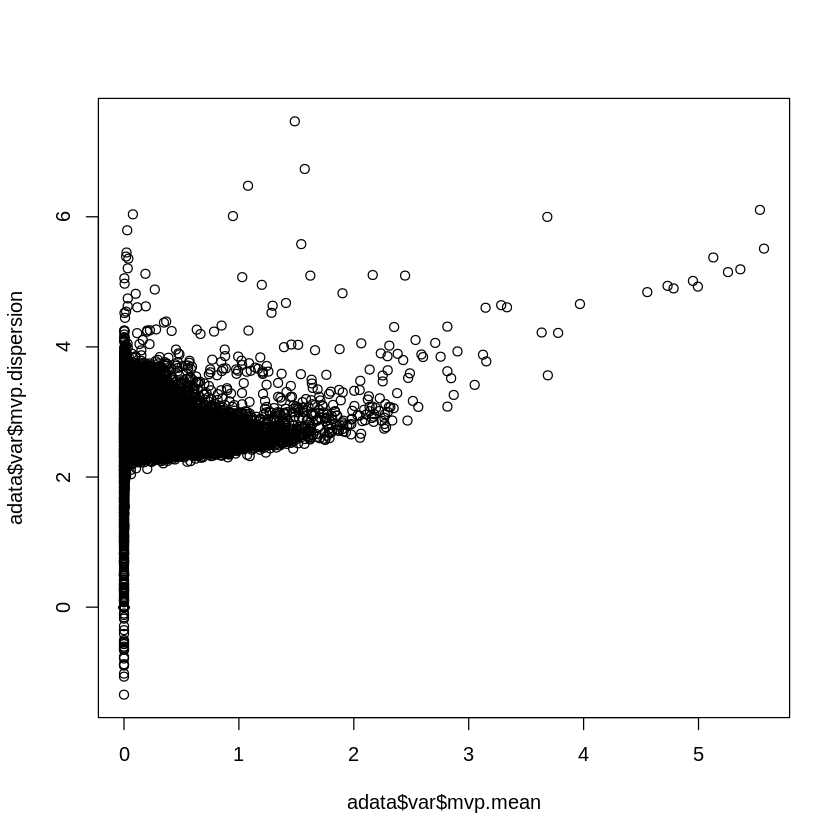

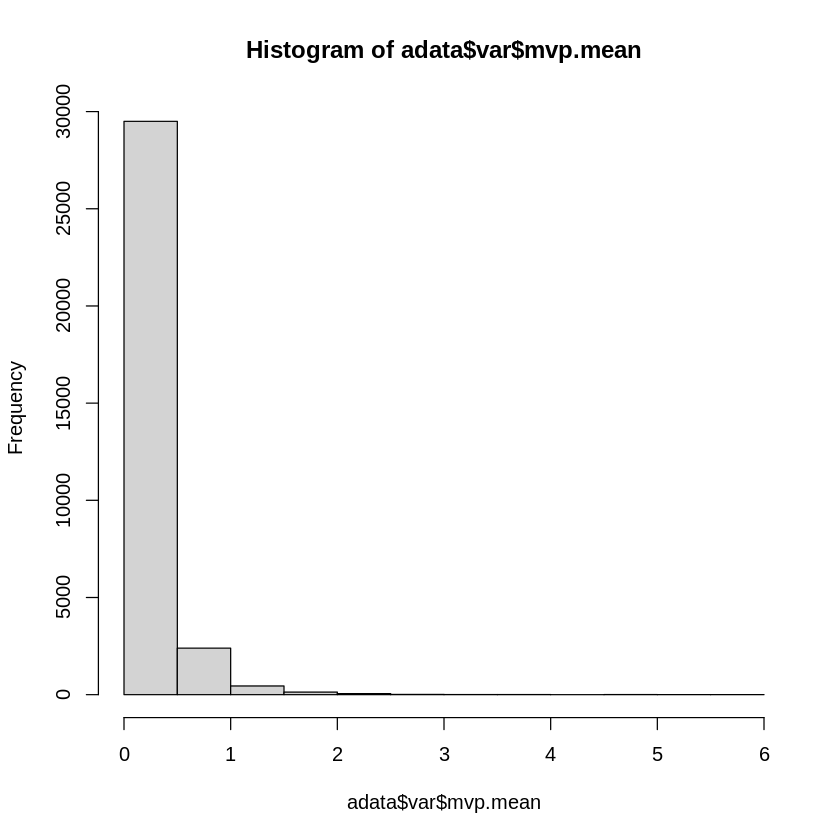

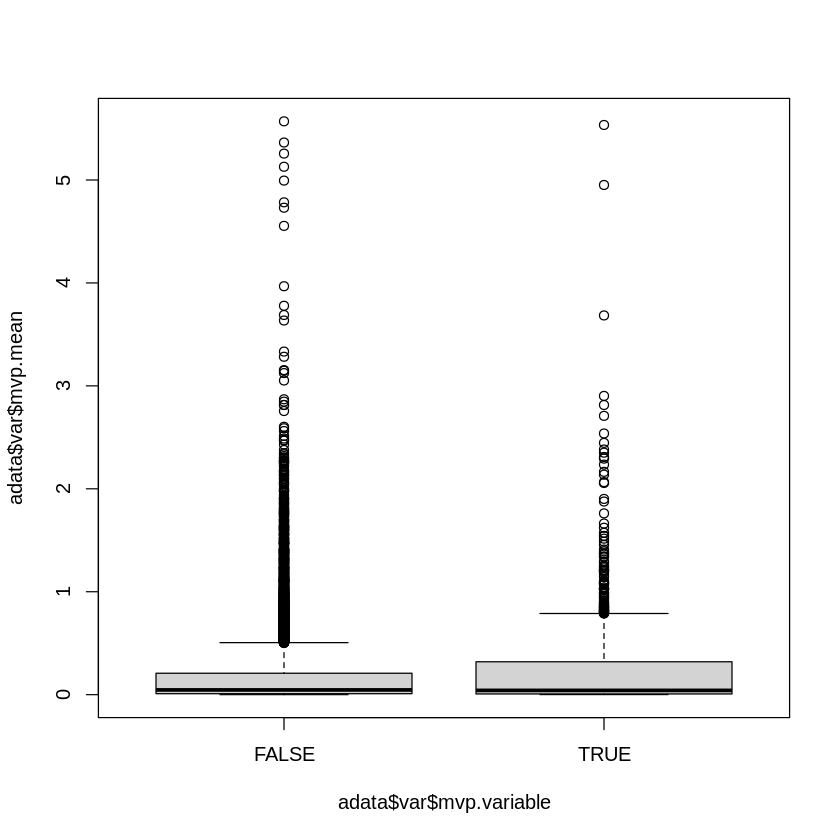

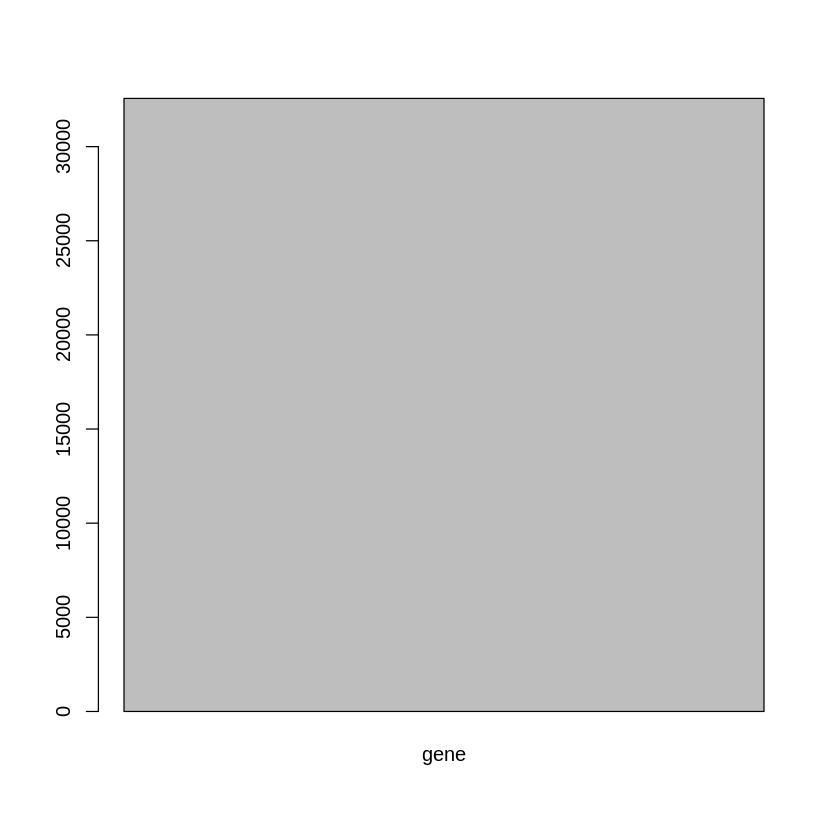

In [10]:
# Scatter plot: mvp.mean vs. mvp.dispersion
plot(adata$var$mvp.mean, adata$var$mvp.dispersion)

# Histogram of mvp.mean
hist(adata$var$mvp.mean)

# Box plot of mvp.variable vs. mvp.mean
boxplot(adata$var$mvp.mean ~ adata$var$mvp.variable)

# Bar plot of feature_biotype
barplot(table(adata$var$feature_biotype))



In [11]:
head(adata$obs['Percent_Mitochondrial'], n = 5)

,Percent_Mitochondrial
,<dbl>
GTCGGGGGGTGG_000_neg_array1,11.004785
CAAATCAATTAT_000_neg_array1,34.210526
ATACAATTGACA_000_neg_array1,7.068224
CTGTTAATGAGA_000_neg_array1,3.179056
CTTCACATTATT_000_neg_array1,2.391569


In [12]:
mito_genes

ERROR: Error in eval(expr, envir, enclos): object 'mito_genes' not found


In [18]:
# Filter genes based on dispersion
adata <- FindVariableFeatures(adata, selection.method = "dispersion", dispersion.min = 0.7, dispersion.max = 1.2)


Warning message:
“The following arguments are not used: dispersion.min, dispersion.max”


ERROR: Error in dimnames(out) <- dimnames(self): 'dimnames' applied to non-array


In [ ]:


# Quality control and preprocessing
adata <- subset(adata, features = n_counts > 1)
adata <- subset(adata, cells = n_counts > 1)

# Normalization and scaling
adata <- NormalizeData(adata)
adata <- ScaleData(adata)

# Dimensionality reduction (PCA)
adata <- RunPCA(adata, features = VariableFeatures(object = adata))

# Select top principal components
top_pcs <- 1:36  # Select the first 36 principal components
adata <- SetAllIdent(adata, value = "merged_cluster")  # Initialize with a dummy cluster label
adata <- RunUMAP(adata, dims = top_pcs)

# Clustering using Louvain
resolution <- 1.0  # You can adjust the resolution parameter
adata <- FindNeighbors(adata, dims = top_pcs)
adata <- FindClusters(adata, resolution = resolution)

# Differential gene expression
de.markers <- FindAllMarkers(adata, test.use = "bimod")

# Merge clusters with fewer than 25 significantly DE genes
# Pseudocode:
for (cluster in unique(adata$seurat_clusters)) {
  de_genes_count <- sum(de.markers$p_val_adj[de.markers$cluster == cluster] < 0.001)
  if (de_genes_count < 25) {
    adata$seurat_clusters[adata$seurat_clusters == cluster] <- "merged_cluster"
  }
}

# Visualization
# UMAP plot colored by clusters
DimPlot(adata, group.by = "seurat_clusters")

# Volcano plot for differentially expressed genes
VlnPlot(adata, features = rownames(de.markers), group.by = "seurat_clusters")
